In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('data/merged_gw.csv')
print(df.shape)
print(df.columns)

(15866, 41)
Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'starts', 'team_a_score', 'team_h_score',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW'],
      dtype='object')


In [3]:
# sample of data and option to show all columns
pd.set_option('display.max_columns', None)
df.sample(5)

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
13902,Oleksandr Zinchenko,DEF,Arsenal,3.2,0,0,9,0,20.8,313,0.06000,0.14000,0.080,1.6600,215,1,0,3.3,10.0,2023-02-04T12:30:00Z,90,8,0,0,0,0,22,0,951573,1,0,1,2.0,1,112980,133007,20027,50,False,1,22.0
15688,Max Kinsey-Wellings,DEF,Bournemouth,-0.5,0,0,0,0,0.0,738,0.00000,0.00000,0.000,0.0000,240,0,0,0.0,0.0,2023-02-18T15:00:00Z,0,20,0,0,0,0,24,0,273,0,1,0,0.0,0,14,52,38,40,False,0,24.0
9848,Che Adams,FWD,Southampton,3.5,1,0,9,0,11.6,411,0.02315,0.36515,0.342,1.5336,173,2,0,6.0,7.8,2022-12-31T15:00:00Z,90,9,0,0,0,0,18,0,199135,1,1,2,41.0,5,-20918,10270,31188,64,False,0,18.0
5377,Liam Cooper,DEF,Leeds,2.5,0,0,15,0,10.9,221,0.00000,0.00000,0.000,0.0000,104,1,0,2.9,14.0,2022-10-16T13:00:00Z,90,1,0,0,0,0,11,0,6712,0,1,0,4.0,2,164,674,510,44,True,0,11.0
2858,Jadon Sancho,MID,Man Utd,5.7,0,2,27,1,3.3,340,0.00000,0.00000,0.000,0.0000,46,0,1,8.0,35.2,2022-09-01T19:00:00Z,67,10,0,0,0,0,5,0,515925,0,1,0,41.0,10,-23704,44147,67851,73,False,0,5.0


In [4]:
# Checking for any null values
df.isna().sum()

name                            0
position                        0
team                            0
xP                              0
assists                         0
bonus                           0
bps                             0
clean_sheets                    0
creativity                      0
element                         0
expected_assists                0
expected_goal_involvements      0
expected_goals                  0
expected_goals_conceded         0
fixture                         0
goals_conceded                  0
goals_scored                    0
ict_index                       0
influence                       0
kickoff_time                    0
minutes                         0
opponent_team                   0
own_goals                       0
penalties_missed                0
penalties_saved                 0
red_cards                       0
round                           0
saves                           0
selected                        0
starts        

In [5]:
# Checking which gameweek data is missing based off kickoff times and cross referencing it with PL website
df.loc[df['GW'].isna() == True, 'kickoff_time'].unique()

array(['2022-12-31T15:00:00Z', '2023-01-01T16:30:00Z',
       '2022-12-30T20:00:00Z', '2022-12-31T12:30:00Z',
       '2022-12-30T19:45:00Z', '2023-01-01T14:00:00Z',
       '2022-12-31T17:30:00Z'], dtype=object)

In [6]:
# filling missing GW as a float
df.fillna(18, inplace=True)
# checking again for any na values
df.isna().sum()

name                          0
position                      0
team                          0
xP                            0
assists                       0
bonus                         0
bps                           0
clean_sheets                  0
creativity                    0
element                       0
expected_assists              0
expected_goal_involvements    0
expected_goals                0
expected_goals_conceded       0
fixture                       0
goals_conceded                0
goals_scored                  0
ict_index                     0
influence                     0
kickoff_time                  0
minutes                       0
opponent_team                 0
own_goals                     0
penalties_missed              0
penalties_saved               0
red_cards                     0
round                         0
saves                         0
selected                      0
starts                        0
team_a_score                  0
team_h_s

In [7]:
# Changing datatype of GW to integer
df['GW'] = df['GW'].astype('int32')

In [8]:
len(df.loc[df['minutes'] == 0])/df.shape[0]

0.5479011723181646

Approximately 55% of the rows have player who did not play in the match and will therefore have 0 points. In order to combat this, we should remove these rows since we only want active players to be included in our models predictions.

In [9]:
df = df.loc[df['minutes'] != 0].reset_index()

In [10]:
# Selecting for specific columns
model_df = df[['name', 'position', 'GW', 'influence', 'creativity', 'threat', 'value', 'total_points']]
# Checking datatypes in selection
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173 entries, 0 to 7172
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7173 non-null   object 
 1   position      7173 non-null   object 
 2   GW            7173 non-null   int32  
 3   influence     7173 non-null   float64
 4   creativity    7173 non-null   float64
 5   threat        7173 non-null   float64
 6   value         7173 non-null   int64  
 7   total_points  7173 non-null   int64  
dtypes: float64(3), int32(1), int64(2), object(2)
memory usage: 420.4+ KB


In [11]:
model_df.isna().sum()

name            0
position        0
GW              0
influence       0
creativity      0
threat          0
value           0
total_points    0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [13]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Fit the OneHotEncoder to the positions column and transform
pos = pd.DataFrame(model_df['position'])
encoded = ohe.fit_transform(pos)

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(encoded, columns=['DEF', 'FWD', 'GK', 'MID'], dtype=int)

# Add original back in
model_df = pd.concat([model_df, encoded_df], axis=1)

# Drop position column
model_df = model_df.drop('position', axis=1)

# Show
model_df.head()

,name,GW,influence,creativity,threat,value,total_points,DEF,FWD,GK,MID
0,Nathan Redmond,1,0.0,0.0,0.0,55,1,0,0,0,1
1,Junior Stanislas,1,0.0,0.0,0.0,50,1,0,0,0,1
2,Armando Broja,1,5.2,0.3,19.0,55,1,0,1,0,0
3,Fabian Schär,1,66.0,14.6,25.0,45,15,1,0,0,0
4,Jonny Evans,1,14.0,1.3,0.0,45,1,1,0,0,0


Random Train-Test Split.

In [14]:
# Train test split

X = model_df.drop('total_points', axis = 1)
y = model_df['total_points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [15]:
# saving player names and GW number in a list for train and test data

train_names = list(n for n in X_train['name'])
train_GW = list(g for g in X_train['GW'])
test_names = list(n for n in X_test['name'])
test_GW = list(g for g in X_test['GW'])

In [16]:
# Removing names from training and test data
X_train = X_train.drop(['name', 'GW'], axis = 1)
X_test = X_test.drop(['name', 'GW'], axis = 1)

In [17]:
# Scale data with Standard Scaler

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [18]:
LR_model = LinearRegression()
LR_model.fit(X_train_scaled, y_train)

print(f"R^2 of the Linear Regression for train data: {LR_model.score(X_train_scaled, y_train)}")
print(f"R^2 of the Linear Regression for test data: {LR_model.score(X_test_scaled, y_test)}")

R^2 of the Linear Regression for train data: 0.5555682508634743
R^2 of the Linear Regression for test data: 0.5987841414600965


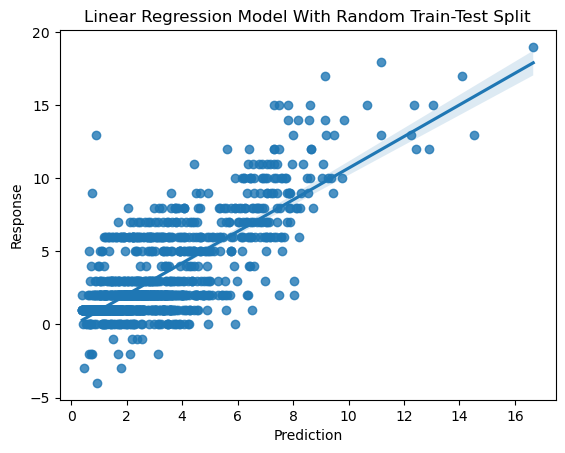

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.regplot(x=LR_model.predict(X_test_scaled), y=y_test)
plt.title('Linear Regression Model With Random Train-Test Split')
plt.xlabel('Prediction')
plt.ylabel('Response')
plt.show()

0        1
1        1
2        1
3       15
4        1
        ..
7168     2
7169     3
7170    -3
7171     2
7172     2
Name: total_points, Length: 7173, dtype: int64